In [15]:
from utils import list_change
import pandas as pd
import numpy as np
import glob
from keras import Sequential
from keras.layers import LSTM, Dense
import copy
import matplotlib.pyplot as plt
from utils import split_dataset, restore_changes
import os
import tensorflow as tf
import cv2
import utils
from utils import readCsv

In [16]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')
# print(tf.__version__)
# tf.test.is_gpu_available()

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [17]:
# def formating(X, Y):
#     x_test = []
#     y_test = []
#     for x, y in zip(X, Y):
#         x_test+=x[0].tolist()
#         y_test+=y[0].tolist()
#     return np.array(x_test), np.array(y_test)
def formating(X, Y):
    x_test = []
    y_test = []
    for x, y in zip(X, Y):
        x_test+=x.tolist()
        y_test+=y.tolist()
    return np.array(x_test), np.array(y_test)

In [18]:
# if not(os.path.exists("data.pkl")):
#     data=[]
#     for _dir in glob.glob('CutFrame_Output/output*/'):
#         data.append([list_change(f) for f in glob.glob(_dir+'use*.txt')])
#     data = np.array(data)
#     utils.save_obj(data,'data')
# else:
#     data = utils.load_obj('data')

# start here

In [19]:
data = readCsv()

In [20]:
# for i in range(len(data)):
#     utils.pointing(i, data)

In [21]:
len(data)

149

In [22]:
data = data.reshape(len(data),7,6)  #  7 frames 不可随意更改

In [23]:
print(data[0])

[[ 828.  635.  918.  512.  612. 1025.]
 [ 625.  676.  738.  597.  597. 1046.]
 [ 518.  740.  440.  779.  565. 1046.]
 [ 488.  821.  390.  884.  527. 1035.]
 [ 488.  880.  471.  908.  508. 1015.]
 [ 449.  817.  312.  890.  543. 1048.]
 [ 558.  689.  660.  582.  591. 1004.]]


In [24]:
# dataf = [pd.DataFrame(i,copy=True) for i in data]
# dataf

In [25]:
X = copy.deepcopy(data)
Y = copy.deepcopy(data)
X = np.array([np.delete(i, -1, axis=0) for i in X])
Y = np.array([np.delete(i, 0, axis=0) for i in Y])
# X = np.delete(X, -1, axis=0)
# Y = np.delete(Y, 0, axis=0)

In [26]:
print(list(zip(X,Y)))

[(array([[ 828.,  635.,  918.,  512.,  612., 1025.],
       [ 625.,  676.,  738.,  597.,  597., 1046.],
       [ 518.,  740.,  440.,  779.,  565., 1046.],
       [ 488.,  821.,  390.,  884.,  527., 1035.],
       [ 488.,  880.,  471.,  908.,  508., 1015.],
       [ 449.,  817.,  312.,  890.,  543., 1048.]], dtype=float16), array([[ 625.,  676.,  738.,  597.,  597., 1046.],
       [ 518.,  740.,  440.,  779.,  565., 1046.],
       [ 488.,  821.,  390.,  884.,  527., 1035.],
       [ 488.,  880.,  471.,  908.,  508., 1015.],
       [ 449.,  817.,  312.,  890.,  543., 1048.],
       [ 558.,  689.,  660.,  582.,  591., 1004.]], dtype=float16)), (array([[ 814. ,  633. ,  883. ,  512. ,  612. , 1025. ],
       [ 590. ,  658. ,  713. ,  570. ,  597. , 1046. ],
       [ 485. ,  741. ,  389. ,  757. ,  565. , 1046. ],
       [ 485. ,  845.5,  367.2,  927. ,  526. , 1043. ],
       [ 502. ,  874. ,  476. ,  922. ,  508. , 1015. ],
       [ 478. ,  808. ,  355. ,  877. ,  543. , 1048. ]], dtype=f

In [27]:
len(X)

149

In [28]:
X, X_val, X_test, Y, Y_val, Y_test = split_dataset(X, Y)
# X_test, Y_test = formating(X_test, Y_test)
X_test=X_test
Y_test=Y_test

In [29]:
index = 0
points = restore_changes(X[index],index,None)
# points = ['pass']+points
# del(points[-1])
for n,f in enumerate(points):
    # if n==0:
    #     continue0
    img = cv2.imread(f'./CutFrame_Output/output{index}/frame_{n}.png')
    for q,p in enumerate(f):
        # print((p[0], p[1]))
        cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 255, 0), -1)
        cv2.putText(img, str(q), (int(p[0]), int(p[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.imwrite(f'outputs/ori/output{n}.png', img)

In [30]:
X_test.shape

(15, 6, 6)

### test

In [31]:
# X = np.array([[X[0]]])
# Y = np.array([[Y[0]]])
# X_test = X[0]
# Y_test = Y[0]

In [32]:
X.shape

(119, 6, 6)

### test end

In [33]:
l=[]
l0=[]
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(6))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X, Y, epochs=500, batch_size=118, validation_data=(X_test, Y_test), verbose=1, shuffle=False)

# minimum_loss = float('inf')
# for epoch in range(2000):
    # for x, y in zip(X, Y):
    #     loss = model.train_on_batch(x, y)
    # print(epoch,end=': ')
    # l0.append(model.evaluate(X_test, Y_test))
    # if l0[-1] < minimum_loss:
    #         minimum_loss = l0[-1]
    #         model.save('best.h5')

2024-09-16 20:32:34.110593: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-16 20:32:34.110677: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-16 20:32:34.110694: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-16 20:32:34.258840: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-16 20:32:34.258888: I external/local_xla/xla/stream_executor

Epoch 1/500


2024-09-16 20:32:36.404644: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f2fb85d6e00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-09-16 20:32:36.404677: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3080 Laptop GPU, Compute Capability 8.6
2024-09-16 20:32:36.417518: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-16 20:32:36.447921: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1726543956.529618  317218 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2/2 [==============================] - 2s 235ms/step - loss: 540786.8125 - val_loss: 488619.7188
Epoch 2/500
2/2 [==============================] - 0s 48ms/step - loss: 502219.5312 - val_loss: 468553.0625
Epoch 3/500
2/2 [==============================] - 0s 42ms/step - loss: 477680.9688 - val_loss: 454212.5312
Epoch 4/500
2/2 [==============================] - 0s 45ms/step - loss: 457405.4688 - val_loss: 440338.3438
Epoch 5/500
2/2 [==============================] - 0s 44ms/step - loss: 438013.1562 - val_loss: 429955.3750
Epoch 6/500
2/2 [==============================] - 0s 39ms/step - loss: 421143.3750 - val_loss: 419334.5312
Epoch 7/500
2/2 [==============================] - 0s 50ms/step - loss: 405298.9062 - val_loss: 408270.3125
Epoch 8/500
2/2 [==============================] - 0s 40ms/step - loss: 387600.5625 - val_loss: 391432.0938
Epoch 9/500
2/2 [==============================] - 0s 39ms/step - loss: 365538.3750 - val_loss: 376530.1250
Epoch 10/500
2/2 [=====================

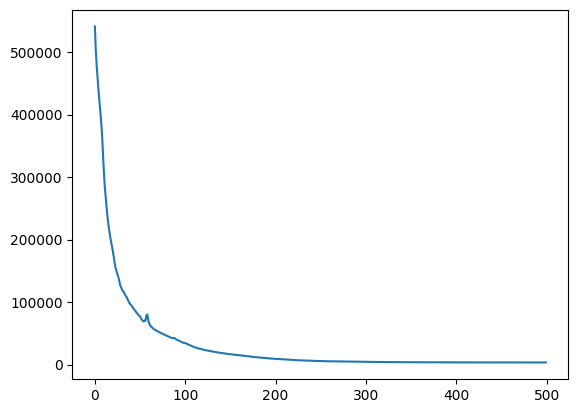

In [34]:
plt.plot(history.history['loss'])
plt.show()

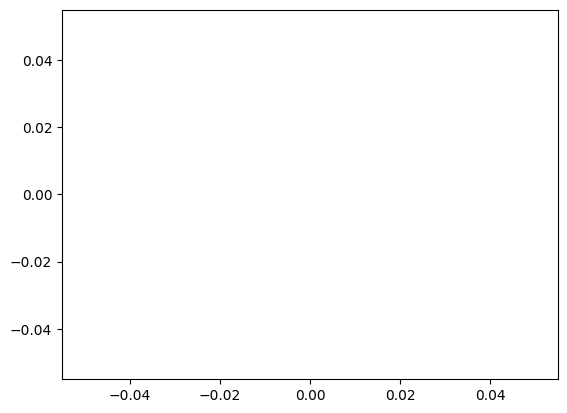

In [35]:
plt.plot(l)
plt.plot(l0)
plt.show()

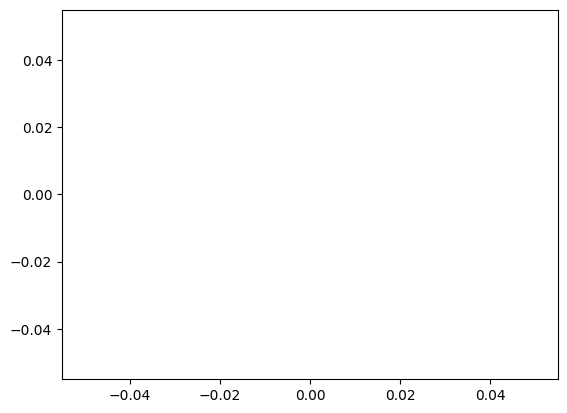

In [36]:
plt.plot(l0)

In [37]:
print(f'best epoch: {min(l0)}',f'best batch: {min(l)}')

ValueError: min() arg is an empty sequence

In [38]:
l0[-1]

IndexError: list index out of range

In [39]:
model.save('last.h5')

/home/itachi/miniconda3/envs/kera/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
data[index]

array([[ 828.,  635.,  918.,  512.,  612., 1025.],
       [ 625.,  676.,  738.,  597.,  597., 1046.],
       [ 518.,  740.,  440.,  779.,  565., 1046.],
       [ 488.,  821.,  390.,  884.,  527., 1035.],
       [ 488.,  880.,  471.,  908.,  508., 1015.],
       [ 449.,  817.,  312.,  890.,  543., 1048.],
       [ 558.,  689.,  660.,  582.,  591., 1004.]], dtype=float16)

In [41]:
restore_changes(data[index],index,None)

[[[828.0, 635.0], [918.0, 512.0], [612.0, 1025.0]],
 [[625.0, 676.0], [738.0, 597.0], [597.0, 1046.0]],
 [[518.0, 740.0], [440.0, 779.0], [565.0, 1046.0]],
 [[488.0, 821.0], [390.0, 884.0], [527.0, 1035.0]],
 [[488.0, 880.0], [471.0, 908.0], [508.0, 1015.0]],
 [[449.0, 817.0], [312.0, 890.0], [543.0, 1048.0]],
 [[558.0, 689.0], [660.0, 582.0], [591.0, 1004.0]]]

In [42]:
# import cv2
# img=cv2.imread('CutFrame_Output/output0/frame_0.png')
# from utils import process_data
# import re
# from utils import list_change
# 
# data = process_data(r'CutFrame_Output/output0/use0.txt')
# data1 = list_change(r'CutFrame_Output/output0/use0.txt')
# print(data)
# print(data1)
# for p in data:
#     # print((p[0], p[1]))
#     cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 255, 0), -1)
# 
# for p in data1:
#     # print((p[0], p[1]))
#     cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 0, 255), -1)
# 
# cv2.imwrite('output.png', img)

In [43]:
# restore_changes(data[0],0)

In [44]:
model = tf.keras.models.load_model('last.h5')
# model.evaluate(X_test, Y_test)

inference part

In [45]:
index = 0

In [46]:
a= model.predict(np.array([data[index][:-1]]))

1/1 [==============================] - 0s 154ms/step


In [47]:
a[0]

array([[ 562.1063 ,  703.58105,  768.5981 ,  589.10364,  572.2451 ,
        1068.5471 ],
       [ 478.65042,  813.12036,  359.22882,  812.9597 ,  526.9956 ,
        1118.2814 ],
       [ 432.97495,  860.9939 ,  339.78867,  951.63403,  516.47845,
        1101.6954 ],
       [ 476.61172,  873.91406,  396.97348,  967.19684,  635.2104 ,
        1113.4208 ],
       [ 445.03012,  837.52045,  329.18185,  881.884  ,  532.3763 ,
        1063.541  ],
       [ 612.64966,  729.6193 ,  722.9023 ,  544.1421 ,  587.6027 ,
        1109.7701 ]], dtype=float32)

In [48]:
data[index]

array([[ 828.,  635.,  918.,  512.,  612., 1025.],
       [ 625.,  676.,  738.,  597.,  597., 1046.],
       [ 518.,  740.,  440.,  779.,  565., 1046.],
       [ 488.,  821.,  390.,  884.,  527., 1035.],
       [ 488.,  880.,  471.,  908.,  508., 1015.],
       [ 449.,  817.,  312.,  890.,  543., 1048.],
       [ 558.,  689.,  660.,  582.,  591., 1004.]], dtype=float16)

In [49]:
points = restore_changes(a,index,None)
points_ori = restore_changes(data[index],index,None)
points = ['pass']+points
# del(points[-1])
for n,f in enumerate(points):
    if n==0:
        continue
    img = cv2.imread(f'./CutFrame_Output/output{index}/frame_{n}.png')
    for q,p in enumerate(f):
        print((p[0], p[1]))
        cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 255, 0), -1)
        cv2.putText(img, str(q), (int(p[0]), int(p[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    for q,p in enumerate(points_ori[n]):
        print((p[0], p[1]))
        cv2.circle(img, (int(p[0]), int(p[1])), 3, (255, 0, 0), -1)
        cv2.putText(img, str(q), (int(p[0]), int(p[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)
    cv2.imwrite(f'outputs/output{n}.png', img)

(562.1063232421875, 703.5810546875)
(768.5980834960938, 589.1036376953125)
(572.2451171875, 1068.547119140625)
(625.0, 676.0)
(738.0, 597.0)
(597.0, 1046.0)
(478.6504211425781, 813.120361328125)
(359.22882080078125, 812.959716796875)
(526.99560546875, 1118.2813720703125)
(518.0, 740.0)
(440.0, 779.0)
(565.0, 1046.0)
(432.9749450683594, 860.993896484375)
(339.7886657714844, 951.634033203125)
(516.4784545898438, 1101.6954345703125)
(488.0, 821.0)
(390.0, 884.0)
(527.0, 1035.0)
(476.6117248535156, 873.9140625)
(396.9734802246094, 967.1968383789062)
(635.2103881835938, 1113.4207763671875)
(488.0, 880.0)
(471.0, 908.0)
(508.0, 1015.0)
(445.0301208496094, 837.5204467773438)
(329.1818542480469, 881.8839721679688)
(532.3762817382812, 1063.541015625)
(449.0, 817.0)
(312.0, 890.0)
(543.0, 1048.0)
(612.649658203125, 729.6193237304688)
(722.9022827148438, 544.14208984375)
(587.6027221679688, 1109.7701416015625)
(558.0, 689.0)
(660.0, 582.0)
(591.0, 1004.0)
